In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("data.csv")

C:\Users\Shruti Nathavani\AppData\Local\Temp\ipykernel_4948\3477112522.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,13,14,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,57,58,59,61,64,66,67,68,69,70,71,72,73,76,78,79,80,82,85,87,88,89,90,91,92,93,94,97,98,99,100,101,103,106,108,109,110,111,112,113,114,115,121,122,124,127,129,130,131,132,133,134,135,136,142,143,145,148,150,151,152,153,154,155,156,157,160,162,163,164,166,169,171,172,173,174,175,176,177,178,184,185,187,190,192,193,194,195,196,197,198,199,205,206,208,211,213,214,215,216,217,218,219,220,223,225,226,227,229,232,234,235,236,237,238,239,240,244,246,247,248,250,253,254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [6]:
data = df

In [7]:
data.shape

(1048547, 260)

In [8]:
data.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,08-04-16,30-04-19,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,14-07-17,13-05-19,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,23-08-17,30-04-19,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,22-12-17,20-08-19,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,10-01-18,15-04-19,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
features = data.columns 
for feature in features:
    print(feature)

CASE_NUMBER
CASE_STATUS
CASE_SUBMITTED
DECISION_DATE
ORIGINAL_CERT_DATE
VISA_CLASS
JOB_TITLE
SOC_CODE
SOC_TITLE
FULL_TIME_POSITION
PERIOD_OF_EMPLOYMENT_START_DATE
PERIOD_OF_EMPLOYMENT_END_DATE
TOTAL_WORKER_POSITIONS
NEW_EMPLOYMENT
CONTINUED_EMPLOYMENT
CHANGE_PREVIOUS_EMPLOYMENT
NEW_CONCURRENT_EMPLOYMENT
CHANGE_EMPLOYER
AMENDED_PETITION
EMPLOYER_NAME
EMPLOYER_BUSINESS_DBA
EMPLOYER_ADDRESS1
EMPLOYER_ADDRESS2
EMPLOYER_CITY
EMPLOYER_STATE
EMPLOYER_POSTAL_CODE
EMPLOYER_COUNTRY
EMPLOYER_PROVINCE
EMPLOYER_PHONE
EMPLOYER_PHONE_EXT
NAICS_CODE
AGENT_REPRESENTING_EMPLOYER
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME
AGENT_ATTORNEY_ADDRESS1
AGENT_ATTORNEY_ADDRESS2
AGENT_ATTORNEY_CITY
AGENT_ATTORNEY_STATE
AGENT_ATTORNEY_POSTAL_CODE
AGENT_ATTORNEY_COUNTRY
AGENT_ATTORNEY_PROVINCE
AGENT_ATTORNEY_PHONE
AGENT_ATTORNEY_PHONE_EXT
STATE_OF_HIGHEST_COURT
NAME_OF_HIGHEST_STATE_COURT
WORKSITE_WORKERS_1
SECONDARY_ENTITY_1
SECONDARY_ENTITY_BUSINESS_NAME_1
WORKSITE_ADDRESS1_1
WORKSITE_ADDRESS2_1
WORKSITE_CITY_1
WORKSIT

In [10]:
features_final = ["CASE_STATUS", "VISA_CLASS","EMPLOYER_NAME","EMPLOYER_COUNTRY","AGENT_REPRESENTING_EMPLOYER","JOB_TITLE","SOC_TITLE","SOC_CODE","NAICS_CODE","CONTINUED_EMPLOYMENT","CHANGE_PREVIOUS_EMPLOYMENT","NEW_CONCURRENT_EMPLOYMENT","CHANGE_EMPLOYER","AMENDED_PETITION","H-1B_DEPENDENT","WILLFUL_VIOLATOR","AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME", "SUPPORT_H1B", "TOTAL_WORKER_POSITIONS" ]
data_final = data[features_final]

In [11]:
duplicate = data_final[data_final.duplicated()]
duplicate.shape

(675509, 19)

In [12]:
data_final = data_final.drop_duplicates()
data_final.shape

(373038, 19)

In [13]:
data_final.dtypes

CASE_STATUS                               object
VISA_CLASS                                object
EMPLOYER_NAME                             object
EMPLOYER_COUNTRY                          object
AGENT_REPRESENTING_EMPLOYER               object
JOB_TITLE                                 object
SOC_TITLE                                 object
SOC_CODE                                  object
NAICS_CODE                               float64
CONTINUED_EMPLOYMENT                      object
CHANGE_PREVIOUS_EMPLOYMENT               float64
NEW_CONCURRENT_EMPLOYMENT                float64
CHANGE_EMPLOYER                          float64
AMENDED_PETITION                         float64
H-1B_DEPENDENT                            object
WILLFUL_VIOLATOR                          object
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME     object
SUPPORT_H1B                               object
TOTAL_WORKER_POSITIONS                   float64
dtype: object

In [14]:
Categorical = ['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','EMPLOYER_COUNTRY','AGENT_REPRESENTING_EMPLOYER','JOB_TITLE','SOC_TITLE','H-1B_DEPENDENT', 'SUPPORT_H1B','AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME','WILLFUL_VIOLATOR']
Numerical = ['TOTAL_WORKER_POSITIONS','AMENDED_PETITION','CHANGE_EMPLOYER','NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT','CONTINUED_EMPLOYMENT','SOC_CODE','NAICS_CODE']

In [15]:
data_final.describe()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,TOTAL_WORKER_POSITIONS
count,373035.000000,373037.000000,373036.000000,373037.000000,373037.000000,373035.000000
mean,449654.224365,0.115980,0.008747,0.239890,0.178132,1.440859
std,190393.859270,1.007719,0.280280,0.930622,0.766049,4.090045
min,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,424410.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,541511.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,541512.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,928120.000000,338.000000,99.000000,99.000000,99.000000,594.000000


In [16]:
data_final.isnull().sum()

CASE_STATUS                                   1
VISA_CLASS                                    1
EMPLOYER_NAME                                10
EMPLOYER_COUNTRY                          21055
AGENT_REPRESENTING_EMPLOYER               21061
JOB_TITLE                                     2
SOC_TITLE                                     4
SOC_CODE                                      4
NAICS_CODE                                    3
CONTINUED_EMPLOYMENT                          1
CHANGE_PREVIOUS_EMPLOYMENT                    1
NEW_CONCURRENT_EMPLOYMENT                     2
CHANGE_EMPLOYER                               1
AMENDED_PETITION                              1
H-1B_DEPENDENT                            13219
WILLFUL_VIOLATOR                          13224
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME     80939
SUPPORT_H1B                              289708
TOTAL_WORKER_POSITIONS                        3
dtype: int64

In [17]:
visa_class_categories = data_final.VISA_CLASS.value_counts().index
print(visa_class_categories)
visa_class_values = data_final.VISA_CLASS.value_counts().values
print(visa_class_values)

Index(['H-1B', 'E-3 Australian', 'H-1B1 Singapore', 'H-1B1 Chile'], dtype='object')
[359377  11508   1173    979]


d:\Program File\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


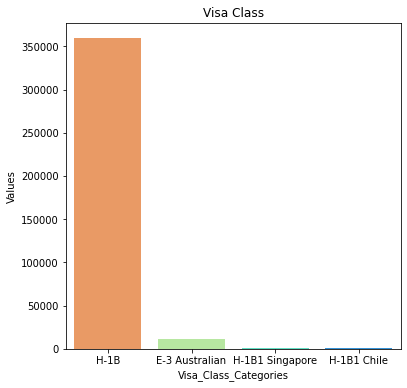

In [18]:
plt.figure(figsize = (6, 6))
bargraph = sns.barplot(visa_class_categories,visa_class_values, data = data_final, palette = 'rainbow_r')

plt.xlabel('Visa_Class_Categories')
plt.ylabel('Values')
plt.title("Visa Class")
plt.show()

In [19]:
pip install missingno

You should consider upgrading via the 'd:\Program File\Python310\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:title={'center':'H1B Petitions by Case Status'}>

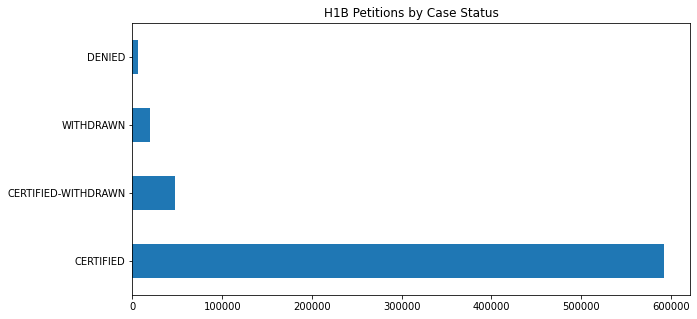

In [20]:
%matplotlib inline
#import ggplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
data['CASE_STATUS'].value_counts().plot(kind='barh',title='H1B Petitions by Case Status')

<AxesSubplot:ylabel='CASE_STATUS'>

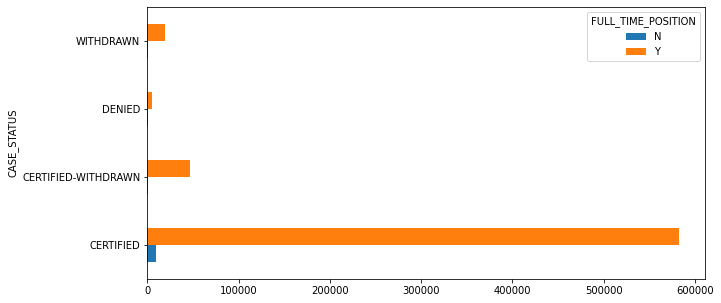

In [21]:
plt.rcParams["figure.figsize"] = (10,5)
pd.crosstab(data['CASE_STATUS'],data['FULL_TIME_POSITION']).plot(kind='barh')

In [22]:

order_by_job_title = data.groupby('JOB_TITLE').count().sort_values(by='CASE_STATUS', ascending=False).index[0:10]
order_by_job_title

Index(['SOFTWARE ENGINEER', 'SOFTWARE DEVELOPER',
       'SENIOR SYSTEMS ANALYST JC60', 'SENIOR SOFTWARE ENGINEER',
       'MANAGER JC50', 'TECHNOLOGY LEAD - US - PRACTITIONER',
       'ASSISTANT PROFESSOR', 'PROGRAMMER ANALYST', 'JAVA DEVELOPER',
       'SENIOR SOFTWARE DEVELOPER'],
      dtype='object', name='JOB_TITLE')

<AxesSubplot:xlabel='JOB_TITLE', ylabel='count'>

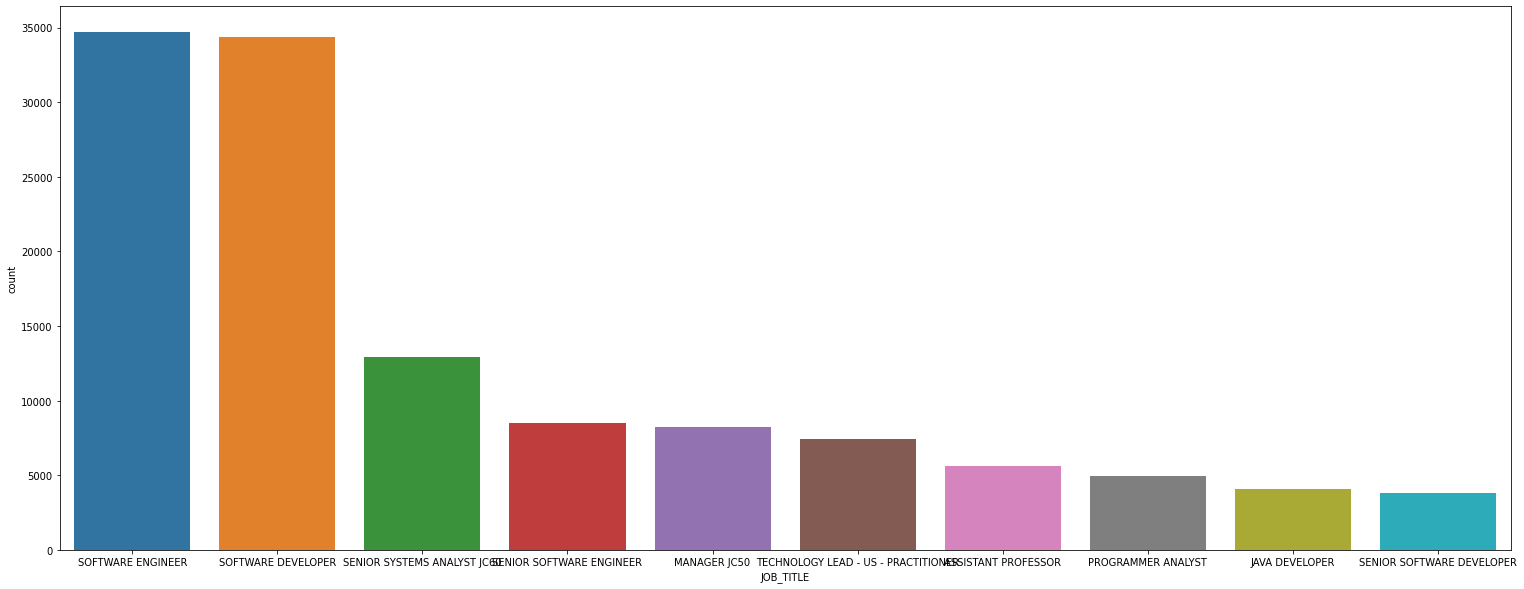

In [23]:
plt.figure(figsize=(26,10))
sns.countplot(x='JOB_TITLE', data=data, order=order_by_job_title)

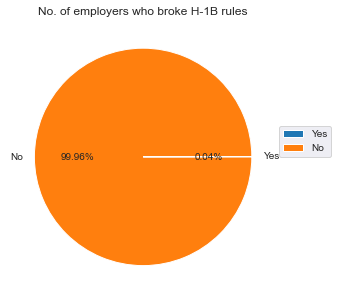

In [24]:
sns.set_style('darkgrid')
Yes = data.WILLFUL_VIOLATOR[data.WILLFUL_VIOLATOR == 'Y'].count()
No = data.WILLFUL_VIOLATOR[data.WILLFUL_VIOLATOR == 'N'].count()

plt.title("No. of employers who broke H-1B rules")
plt.pie([Yes, No], labels=['Yes', 'No'], autopct="%.2f%%")
plt.legend(loc=(1,0.5))

plt.show()

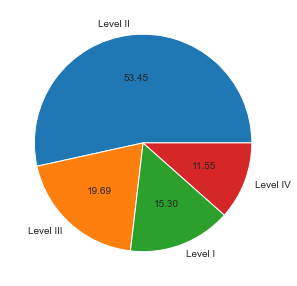

In [25]:
wage_level = data['PW_WAGE_LEVEL_1'].value_counts()
plt.pie(wage_level,autopct='%.2f',labels=['Level II','Level III','Level I','Level IV'])
plt.show()

<AxesSubplot:title={'center':'H1B Petitions by Case Status'}>

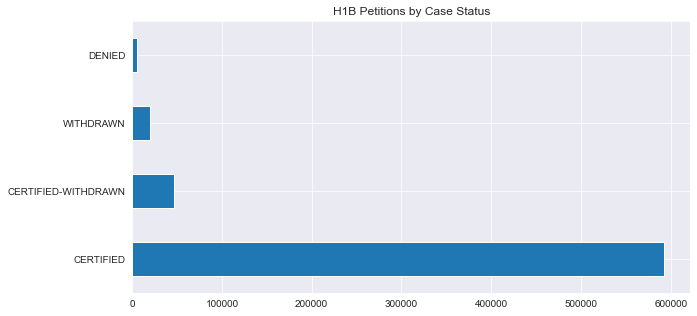

In [26]:
%matplotlib inline
#import ggplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
data['CASE_STATUS'].value_counts().plot(kind='barh',title='H1B Petitions by Case Status')

d:\Program File\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL_WORKER_POSITIONS', ylabel='NEW_CONCURRENT_EMPLOYMENT'>

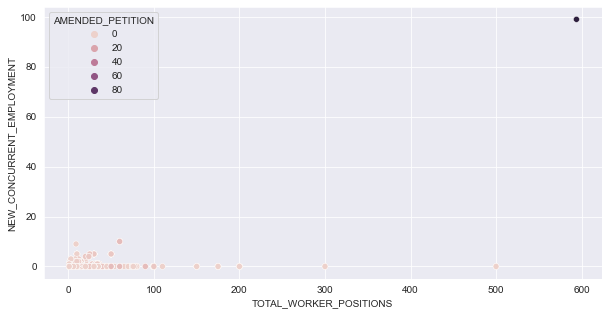

In [27]:
sns.scatterplot(data['TOTAL_WORKER_POSITIONS'],data['NEW_CONCURRENT_EMPLOYMENT'],data['AMENDED_PETITION'])

In [28]:
((data_final['VISA_CLASS'] == 'E-3 Australian') | (data_final['VISA_CLASS'] == 'H-1B1 Singapore') | (data_final['VISA_CLASS'] == 'H-1B1 Chile')).sum()/((data_final['VISA_CLASS'] == 'H-1B').sum())*100

3.8010223247453236

In [29]:
data_H1B = data_final[data_final['VISA_CLASS'] == 'H-1B']

In [30]:
data_H1B.shape

(359377, 19)

In [31]:
data_H1B.CASE_STATUS.isnull().sum()

0

In [32]:
#Checking for the categories of the case status 
case_status_categories = data_H1B.CASE_STATUS.value_counts().index
case_status_values = data_H1B.CASE_STATUS.value_counts().values

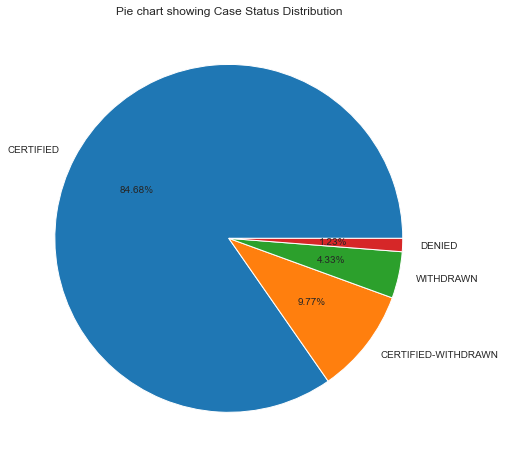

In [33]:
plt.figure(figsize = (8, 8))
plt.pie(case_status_values, labels=case_status_categories,autopct='%1.2f%%')
plt.title('Pie chart showing Case Status Distribution')
plt.show()

In [34]:
Agent_categories = data_H1B.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False).index
Agent_values = data_H1B.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False).values

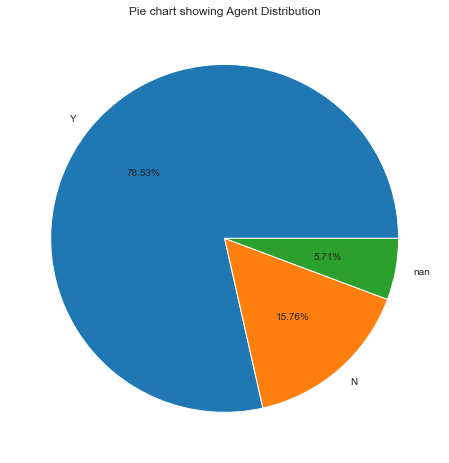

In [35]:
plt.figure(figsize = (8, 8))
plt.pie(Agent_values, labels=Agent_categories,autopct='%1.2f%%')
plt.title('Pie chart showing Agent Distribution')
plt.show()

In [36]:
data_H1B.AGENT_REPRESENTING_EMPLOYER.isnull().sum()

20516

In [37]:
data_H1B["AGENT_REPRESENTING_EMPLOYER"].fillna("N",inplace=True)

C:\Users\Shruti Nathavani\AppData\Local\Temp\ipykernel_4948\3608433016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_H1B["AGENT_REPRESENTING_EMPLOYER"].fillna("N",inplace=True)


In [38]:
data_H1B.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False)

Y    282221
N     77156
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

In [39]:
data_H1B.JOB_TITLE.value_counts()[:20]

SOFTWARE ENGINEER            11192
SOFTWARE DEVELOPER           10785
SENIOR SOFTWARE ENGINEER      4052
ASSISTANT PROFESSOR           3967
BUSINESS ANALYST              2305
JAVA DEVELOPER                1960
PROGRAMMER ANALYST            1813
DATA SCIENTIST                1797
PROJECT MANAGER               1562
ACCOUNTANT                    1482
ASSOCIATE                     1383
SYSTEMS ENGINEER              1368
DATABASE ADMINISTRATOR        1330
DATA ANALYST                  1318
DEVOPS ENGINEER               1224
MECHANICAL ENGINEER           1209
APPLICATION DEVELOPER         1189
RESEARCH ASSOCIATE            1148
PROJECT ENGINEER              1103
SENIOR SOFTWARE DEVELOPER     1088
Name: JOB_TITLE, dtype: int64

In [40]:
data_H1B.JOB_TITLE.isnull().sum()

1

In [41]:
data_H1B = data_H1B.dropna(subset = ['JOB_TITLE'])

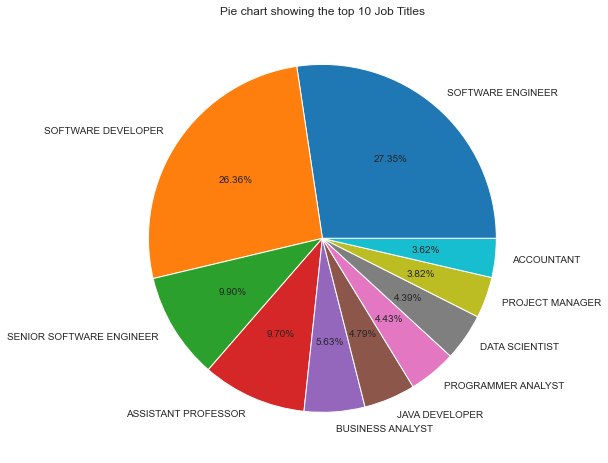

In [42]:
JobTitle = data_H1B.JOB_TITLE.value_counts().index[:10]
JobTitle_values = data_H1B.JOB_TITLE.value_counts().values[:10]
plt.figure(figsize = (8, 8))
plt.pie(JobTitle_values, labels = JobTitle, autopct='%1.2f%%')
plt.title('Pie chart showing the top 10 Job Titles')
plt.show()

In [43]:
data_H1B.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.isnull().sum()

77283

In [44]:
data_H1B.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.fillna(data_H1B.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.mode()[0], inplace = True)

In [45]:
all_applications = data_H1B.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.value_counts()[:25]
all_applications

FRAGOMEN, DEL REY, BERNSEN & LOEWY, LLP                103817
BERRY APPLEMAN & LEIDEN LLP                             16057
OGLETREE, DEAKINS, NASH, SMOAK & STEWART, P.C.           5277
LAW OFFICE OF THOMAS V. ALLEN                            3996
ERICKSON IMMIGRATION GROUP                               3531
SEYFARTH SHAW LLP                                        3351
FRAGOMEN, DEL REY, BERNSEN & LOEWY LLP                   2833
FAKHOURY GLOBAL IMMIGRATION, USA PC                      2466
GLOBAL IMMIGRATION ASSOCIATES, PC                        2454
FRAGOMEN, DEL REY, BERNSEN & LOEWY                       2420
INTERNATIONAL LEGAL AND BUSINESS SERVICES GROUP LLP      2394
GLOBAL IMMIGRATION PARTNERS, INC                         2296
PEARL LAW GROUP                                          2123
CHUGH, LLP                                               1918
RAMINENI & SHEPARD, LLC                                  1793
GIBNEY, ANTHONY & FLAHERTY, LLP                          1787
GLOBAL I

In [46]:
rejection = data_H1B[(data_H1B['CASE_STATUS'] == "DENIED")]
rejection.AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME.value_counts()[:25]

FRAGOMEN, DEL REY, BERNSEN & LOEWY, LLP           1400
BERRY APPLEMAN & LEIDEN LLP                        187
OGLETREE, DEAKINS, NASH, SMOAK & STEWART, P.C.      58
ERICKSON IMMIGRATION GROUP                          55
EY LAW LLP                                          45
PEARL LAW GROUP                                     31
SEYFARTH SHAW LLP                                   30
FRAGOMEN, DEL REY, BERNSEN & LOEWY                  26
LAW OFFICE OF THOMAS V. ALLEN                       23
GLOBAL IMMIGRATION PARTNERS, INC                    23
FRAGOMEN, DEL REY, BERNSEN & LOEWY LLP              19
LAW OFFICE OF KENNETH W. JIANG                      17
LAW OFFICES OF D.ROBERT JONES PLLC                  15
MORGAN, LEWIS & BOCKIUS LLP                         14
FRAGOMEN DEL REY BERNSEN & LOEWY LLP                14
GARFINKEL IMMIGRATION LAW FIRM                      13
BBI LAW GROUP, P.C.                                 13
RANA LAW FIRM                                       12
GARSON LLP

In [47]:
data_H1B.EMPLOYER_NAME.isnull().sum()

9

In [48]:
data_H1B = data_H1B.dropna(subset = ['EMPLOYER_NAME'])

In [49]:
data_H1B.EMPLOYER_NAME.isnull().sum()

0

In [50]:
all_employers = data_H1B.EMPLOYER_NAME.value_counts()[:25]
all_employers

GOOGLE LLC                           9198
IBM CORPORATION                      2085
AMAZON.COM SERVICES, INC.            1744
DELOITTE CONSULTING LLP              1199
JPMORGAN CHASE & CO.                 1056
IBM INDIA PRIVATE LIMITED            1046
FACEBOOK, INC.                        959
WAL-MART ASSOCIATES, INC.             812
APPLE INC.                            805
SALESFORCE.COM, INC.                  797
ACCENTURE LLP                         741
WIPRO LIMITED                         739
TATA CONSULTANCY SERVICES LIMITED     736
L&T TECHNOLOGY SERVICES LIMITED       689
NTT DATA, INC.                        654
CUMMINS INC.                          645
MICROSOFT CORPORATION                 642
LARSEN & TOUBRO INFOTECH LIMITED      626
AMAZON WEB SERVICES, INC.             588
TESLA, INC.                           571
BANK OF AMERICA N.A.                  544
CISCO SYSTEMS, INC.                   539
PAYPAL, INC.                          517
POPULUS GROUP LLC                 

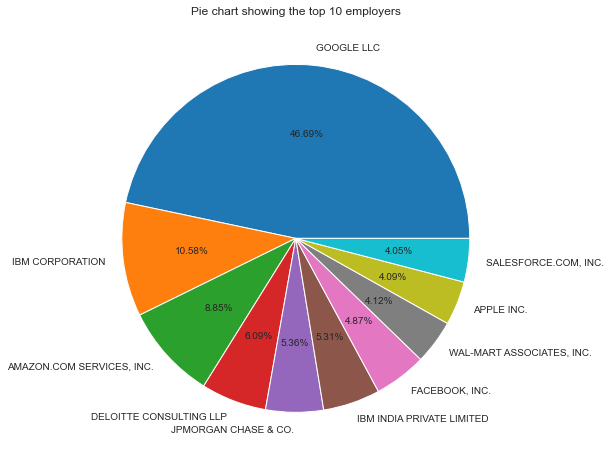

In [51]:
employers = data_H1B.EMPLOYER_NAME.value_counts().index[:10]
employers_values = data_H1B.EMPLOYER_NAME.value_counts().values[:10]
plt.figure(figsize = (8, 8))
plt.pie(employers_values, labels = employers, autopct='%1.2f%%')
plt.title('Pie chart showing the top 10 employers')
plt.show()

In [52]:
data_H1B.EMPLOYER_COUNTRY.isnull().sum()

20508

In [53]:
data_H1B.EMPLOYER_COUNTRY.fillna(data_H1B.EMPLOYER_COUNTRY.mode()[0], inplace = True)

In [54]:
data_H1B.EMPLOYER_COUNTRY.isnull().sum()

0

In [55]:
data_H1B.EMPLOYER_COUNTRY.value_counts()

UNITED STATES OF AMERICA    359338
CANADA                          19
INDIA                            3
GUATEMALA                        2
ALBANIA                          2
TURKEY                           1
AFGHANISTAN                      1
AUSTRALIA                        1
Name: EMPLOYER_COUNTRY, dtype: int64

In [56]:
data_H1B.SOC_TITLE.isnull().sum()

3

In [57]:
data_H1B = data_H1B.dropna(subset = ['SOC_TITLE'])

In [58]:
data_H1B.SOC_TITLE.value_counts()

SOFTWARE DEVELOPERS, APPLICATIONS                     108930
COMPUTER OCCUPATIONS, ALL OTHER                        30422
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                  20526
COMPUTER SYSTEMS ANALYSTS                              13895
MECHANICAL ENGINEERS                                    8850
                                                       ...  
MECHANICAL ENGINEEERS                                      1
MECHANCIAL ENGINEER                                        1
INDUSTRIAL ENGINEER                                        1
HEALTH AND SAFETY ENGS., EXCEPT MINING SAFETY ENGS         1
15-2031                                                    1
Name: SOC_TITLE, Length: 859, dtype: int64

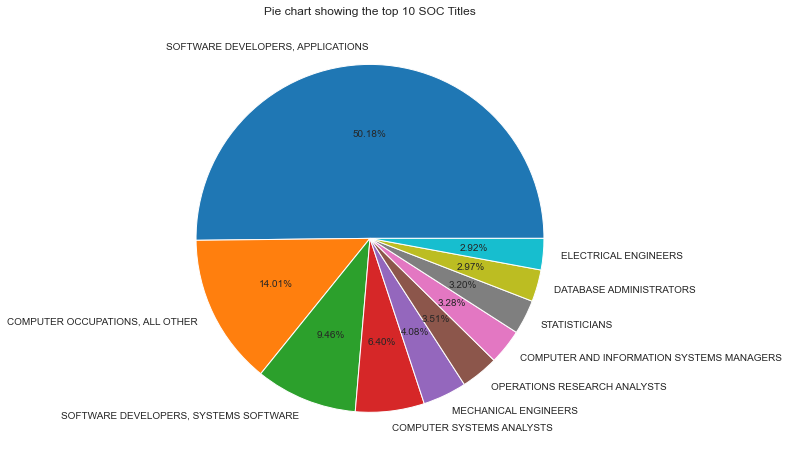

In [59]:
plt.figure(figsize = (8, 8))
plt.pie(data_H1B.SOC_TITLE.value_counts().values[:10], labels = data_H1B.SOC_TITLE.value_counts().index[:10], autopct='%1.2f%%')
plt.title('Pie chart showing the top 10 SOC Titles')
plt.show()

In [60]:
data_H1B['H-1B_DEPENDENT'].value_counts(dropna = False)

N      276506
Y       82843
NaN        15
Name: H-1B_DEPENDENT, dtype: int64

In [61]:
data_H1B = data_H1B.dropna(subset = ['H-1B_DEPENDENT'])

In [62]:
Categorical

['CASE_STATUS',
 'VISA_CLASS',
 'EMPLOYER_NAME',
 'EMPLOYER_COUNTRY',
 'AGENT_REPRESENTING_EMPLOYER',
 'JOB_TITLE',
 'SOC_TITLE',
 'H-1B_DEPENDENT',
 'SUPPORT_H1B',
 'AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME',
 'WILLFUL_VIOLATOR']

In [63]:
data_H1B['SUPPORT_H1B'].value_counts(dropna = False)

NaN    276061
Y       81913
N        1375
Name: SUPPORT_H1B, dtype: int64

In [64]:
data_H1B.SUPPORT_H1B.fillna(data_H1B.SUPPORT_H1B.mode()[0], inplace = True)

In [65]:
data_H1B['SUPPORT_H1B'].value_counts(dropna = False)

Y    357974
N      1375
Name: SUPPORT_H1B, dtype: int64

In [66]:
data_H1B['WILLFUL_VIOLATOR'].value_counts(dropna = False)

N    359084
Y       265
Name: WILLFUL_VIOLATOR, dtype: int64

In [67]:
Categorical

['CASE_STATUS',
 'VISA_CLASS',
 'EMPLOYER_NAME',
 'EMPLOYER_COUNTRY',
 'AGENT_REPRESENTING_EMPLOYER',
 'JOB_TITLE',
 'SOC_TITLE',
 'H-1B_DEPENDENT',
 'SUPPORT_H1B',
 'AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME',
 'WILLFUL_VIOLATOR']

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #creating an object of LabelEncoder class
WillfulVoilator = le.fit_transform(data_H1B['WILLFUL_VIOLATOR'])
SupportH1B = le.fit_transform(data_H1B['SUPPORT_H1B'])
H1B_Dependent = le.fit_transform(data_H1B['H-1B_DEPENDENT'])
SOCTitle = le.fit_transform(data_H1B['SOC_TITLE'])
CountryEmployer = le.fit_transform(data_H1B['EMPLOYER_COUNTRY'])
EmployerName = le.fit_transform(data_H1B['EMPLOYER_NAME'].astype(str))
CaseStatus = le.fit_transform(data_H1B['CASE_STATUS'])
VisaClass = le.fit_transform(data_H1B['VISA_CLASS'])
LawFirm = le.fit_transform(data_H1B['AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME'].astype(str))
AgentRepresentingEmployer = le.fit_transform(data_H1B['AGENT_REPRESENTING_EMPLOYER'])
JobTitle = le.fit_transform(data_H1B['JOB_TITLE'].astype(str))
SOCCode = le.fit_transform(data_H1B['SOC_CODE'])

In [69]:
data_H1B['WILLFUL_VIOLATOR'] = WillfulVoilator
data_H1B['SUPPORT_H1B'] = SupportH1B
data_H1B['H-1B_DEPENDENT'] = H1B_Dependent
data_H1B['SOC_TITLE'] = SOCTitle
data_H1B['EMPLOYER_COUNTRY'] = CountryEmployer
data_H1B['EMPLOYER_NAME'] = EmployerName
data_H1B['CASE_STATUS'] = CaseStatus
data_H1B['VISA_CLASS'] = VisaClass 
data_H1B['AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME'] = LawFirm 
data_H1B['AGENT_REPRESENTING_EMPLOYER'] = AgentRepresentingEmployer
data_H1B['SOC_CODE'] = SOCCode
data_H1B['JOB_TITLE'] = JobTitle

In [70]:
data_H1B.SOC_CODE.isnull().sum()

0

In [71]:
data_H1B.SOC_CODE.value_counts()

95     109146
108     31037
97      20551
92      14210
157      8865
        ...  
327         1
55          1
334         1
50          1
526         1
Name: SOC_CODE, Length: 527, dtype: int64

In [72]:
data_H1B

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,SUPPORT_H1B,TOTAL_WORKER_POSITIONS
0,3,0,47135,7,0,7658,14,2,541810.0,1,0.0,0.0,0.0,0.0,0,0,1520,1,1.0
5,3,0,36533,7,0,33178,14,2,541810.0,1,0.0,0.0,0.0,0.0,0,0,1520,1,1.0
6,3,0,37474,7,1,24150,14,2,454111.0,0,1.0,0.0,0.0,0.0,0,0,1517,1,1.0
7,3,0,32327,7,1,34564,14,2,541990.0,1,0.0,0.0,0.0,0.0,0,0,1103,1,1.0
8,3,0,55256,7,1,404,14,2,541820.0,1,0.0,0.0,0.0,0.0,0,0,5965,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664605,0,0,29837,7,1,37345,836,524,541380.0,0.0,0.0,0.0,0.0,1.0,0,0,1491,1,1.0
664608,0,0,29837,7,1,37349,836,524,541380.0,1.0,0.0,0.0,0.0,0.0,0,0,1491,1,1.0
664609,2,0,45221,7,0,18425,230,525,488320.0,0.0,0.0,0.0,0.0,0.0,0,0,1520,1,6.0
664610,0,0,45221,7,0,18425,230,525,488320.0,0.0,0.0,0.0,0.0,0.0,0,0,1520,1,6.0


In [73]:
data_H1B.CONTINUED_EMPLOYMENT.value_counts()
data_H1B.drop(data_H1B[data_H1B['CONTINUED_EMPLOYMENT'] == 'B'].index, inplace = True)

In [74]:
data_H1B.CONTINUED_EMPLOYMENT.value_counts()

0     273815
1      78997
0       1428
2       1353
5       1203
4        872
1        622
10       387
3        362
25        46
6         42
15        40
8         38
20        29
5         22
4         17
12        15
30        12
50         9
2          7
40         6
3          4
18         4
7          3
13         3
99         2
35         2
8          1
10         1
17         1
45         1
21         1
11         1
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [75]:
data_H1B.AMENDED_PETITION.value_counts()

0.0     312252
1.0      42227
5.0       1514
2.0       1283
4.0        886
3.0        518
10.0       340
15.0       252
6.0         22
11.0        20
20.0        15
8.0          6
30.0         3
7.0          3
99.0         2
14.0         1
25.0         1
35.0         1
Name: AMENDED_PETITION, dtype: int64

In [76]:
data_H1B.NAICS_CODE.isnull().sum()

1

In [77]:
data_H1B = data_H1B.dropna(subset = ['NAICS_CODE'])

In [78]:
data_H1B.NAICS_CODE.isnull().sum()

0

In [79]:
data_H1B.NAICS_CODE.value_counts(dropna = False)

541511.0    91037
541512.0    25605
611310.0    20876
541519.0     9965
541330.0     9765
            ...  
32739.0         1
23891.0         1
44521.0         1
33152.0         1
44531.0         1
Name: NAICS_CODE, Length: 1959, dtype: int64

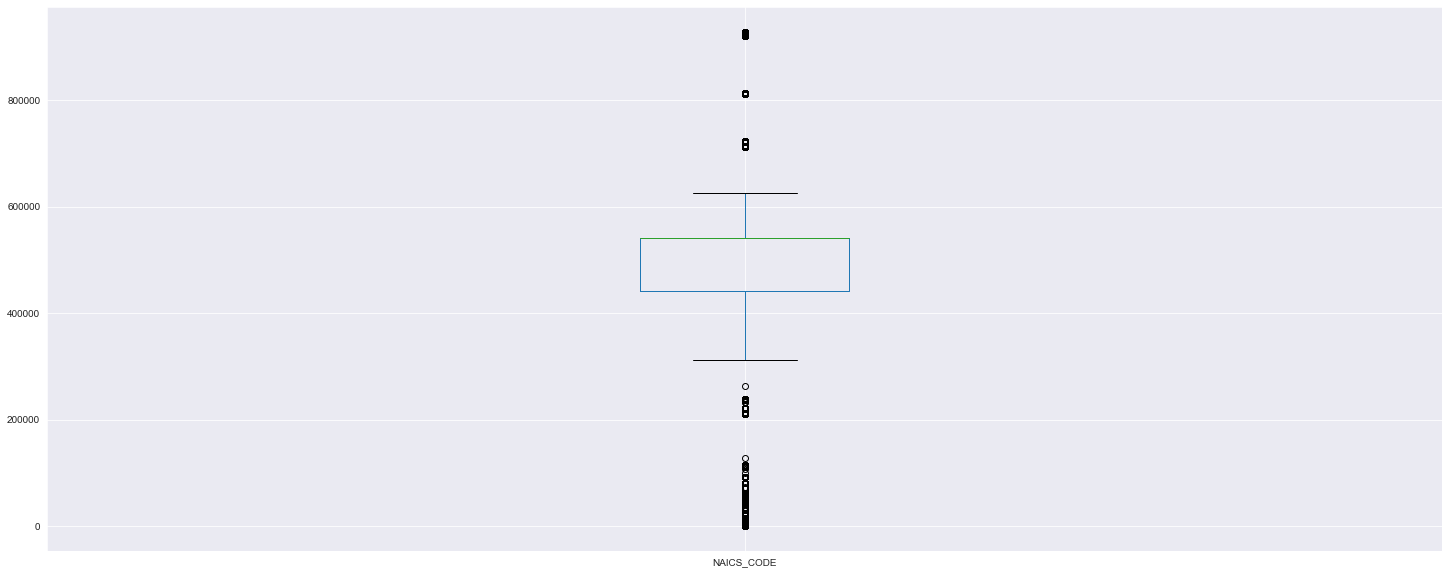

In [80]:
countplt, ax = plt.subplots(figsize = (25,10))
ax = data_H1B.boxplot(column = 'NAICS_CODE')

In [81]:
data_H1B.TOTAL_WORKER_POSITIONS.isnull().sum()

2

In [82]:
data_H1B = data_H1B.dropna(subset = ['TOTAL_WORKER_POSITIONS'])


In [83]:
data_H1B.TOTAL_WORKER_POSITIONS.isnull().sum()

0

In [84]:
data_H1B.TOTAL_WORKER_POSITIONS.value_counts()

1.0      344852
2.0        2870
10.0       2146
3.0        2028
5.0        1723
20.0       1033
15.0        913
25.0        864
50.0        617
4.0         493
30.0        474
6.0         375
12.0        142
24.0        132
8.0         132
7.0         124
100.0        74
40.0         46
9.0          36
75.0         33
45.0         26
11.0         22
16.0         20
14.0         18
60.0         17
17.0         15
35.0         15
18.0         12
13.0         12
32.0          9
150.0         8
19.0          7
23.0          6
36.0          6
200.0         4
28.0          4
22.0          4
34.0          4
175.0         3
594.0         2
300.0         2
80.0          2
500.0         2
70.0          2
90.0          2
37.0          1
78.0          1
76.0          1
65.0          1
99.0          1
31.0          1
47.0          1
26.0          1
43.0          1
54.0          1
110.0         1
21.0          1
Name: TOTAL_WORKER_POSITIONS, dtype: int64

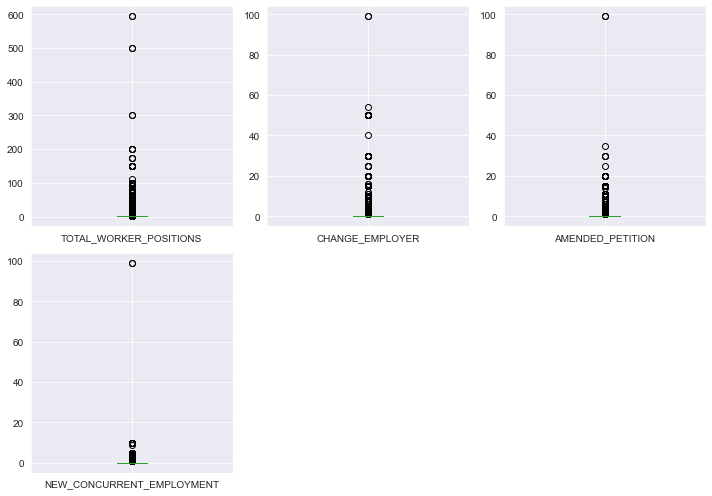

In [85]:
fig, ax = plt.subplots(2,3, figsize = (10,7))
numerical_data = data_H1B[["TOTAL_WORKER_POSITIONS", "CHANGE_EMPLOYER", "AMENDED_PETITION", "NEW_CONCURRENT_EMPLOYMENT", "CHANGE_PREVIOUS_EMPLOYMENT"]]
for i,el in enumerate(list(numerical_data.columns.values)[:-1]):
    a = numerical_data.boxplot(el, ax=ax.flatten()[i])


fig.delaxes(ax[1,2]) 
fig.delaxes(ax[1,1])# remove empty subplot
plt.tight_layout() 

plt.show()

In [86]:
# countplt, ax = plt.subplots(figsize = (5,5))
# ax = numerical_data.boxplot(column = 'NAICS_CODE')

In [87]:
data_H1B.isnull().sum()

CASE_STATUS                              0
VISA_CLASS                               0
EMPLOYER_NAME                            0
EMPLOYER_COUNTRY                         0
AGENT_REPRESENTING_EMPLOYER              0
JOB_TITLE                                0
SOC_TITLE                                0
SOC_CODE                                 0
NAICS_CODE                               0
CONTINUED_EMPLOYMENT                     0
CHANGE_PREVIOUS_EMPLOYMENT               0
NEW_CONCURRENT_EMPLOYMENT                1
CHANGE_EMPLOYER                          0
AMENDED_PETITION                         0
H-1B_DEPENDENT                           0
WILLFUL_VIOLATOR                         0
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME    0
SUPPORT_H1B                              0
TOTAL_WORKER_POSITIONS                   0
dtype: int64

In [88]:
data_H1B
data_H1B.describe()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,SUPPORT_H1B,TOTAL_WORKER_POSITIONS
count,359343.000000,359343.0,359343.000000,359343.000000,359343.000000,359343.000000,359343.000000,359343.000000,359343.000000,359343.000000,359342.000000,359343.000000,359343.000000,359343.000000,359343.000000,359343.000000,359343.000000,359343.000000
mean,0.251960,0.0,33097.854863,6.999686,0.785358,55238.884297,494.595364,123.933685,451250.675552,0.118155,0.008927,0.246066,0.182900,0.230532,0.000737,2519.762706,0.996174,1.454265
std,0.687468,0.0,19188.908747,0.036585,0.410574,31534.150905,256.671719,80.405191,188810.979617,1.025589,0.285185,0.945107,0.776771,0.421174,0.027146,1690.198622,0.061740,4.162290
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.0,16744.000000,7.000000,1.000000,26954.000000,207.000000,95.000000,441110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1520.000000,1.000000,1.000000
50%,0.000000,0.0,31803.000000,7.000000,1.000000,57734.000000,526.000000,95.000000,541511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1520.000000,1.000000,1.000000
75%,0.000000,0.0,50289.000000,7.000000,1.000000,82684.000000,752.000000,135.000000,541512.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3981.000000,1.000000,1.000000
max,3.000000,0.0,65727.000000,7.000000,1.000000,109610.000000,858.000000,526.000000,928120.000000,338.000000,99.000000,99.000000,99.000000,1.000000,1.000000,6465.000000,1.000000,594.000000


In [89]:
data_H1B.isnull().sum()

CASE_STATUS                              0
VISA_CLASS                               0
EMPLOYER_NAME                            0
EMPLOYER_COUNTRY                         0
AGENT_REPRESENTING_EMPLOYER              0
JOB_TITLE                                0
SOC_TITLE                                0
SOC_CODE                                 0
NAICS_CODE                               0
CONTINUED_EMPLOYMENT                     0
CHANGE_PREVIOUS_EMPLOYMENT               0
NEW_CONCURRENT_EMPLOYMENT                1
CHANGE_EMPLOYER                          0
AMENDED_PETITION                         0
H-1B_DEPENDENT                           0
WILLFUL_VIOLATOR                         0
AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME    0
SUPPORT_H1B                              0
TOTAL_WORKER_POSITIONS                   0
dtype: int64

In [90]:
data_H1B = data_H1B.dropna(subset = ['NEW_CONCURRENT_EMPLOYMENT'])

In [91]:
data_H1B.shape

(359342, 19)

In [92]:
data_H1B.EMPLOYER_COUNTRY.value_counts()

7    359313
3        19
5         3
4         2
1         2
6         1
0         1
2         1
Name: EMPLOYER_COUNTRY, dtype: int64

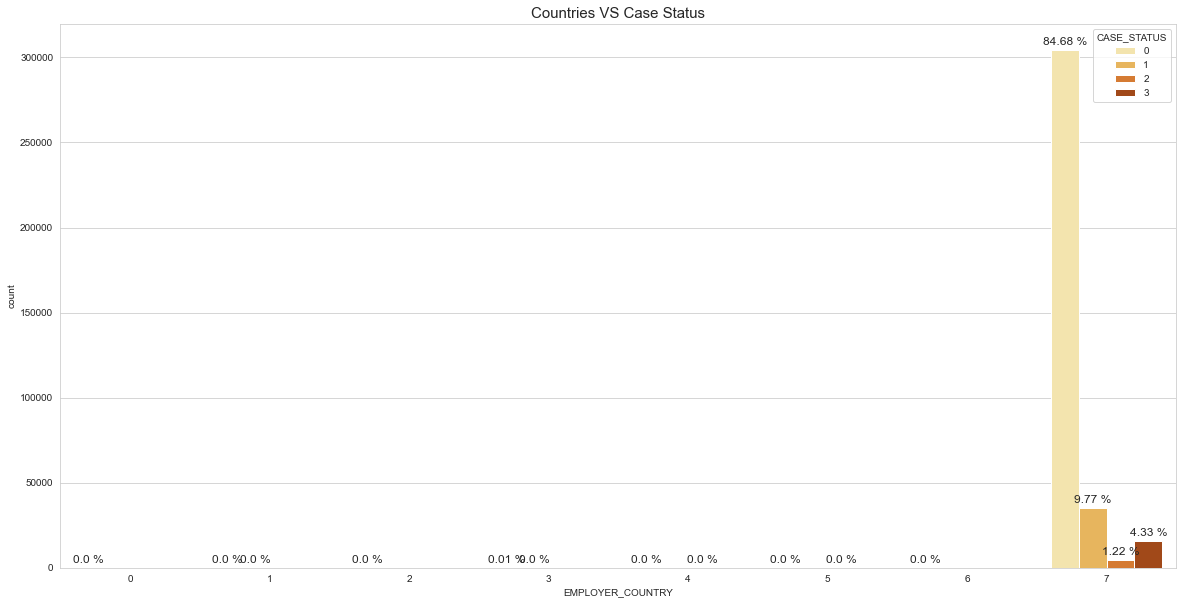

In [93]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (20,10))
ax=sns.countplot(x = data_H1B.EMPLOYER_COUNTRY,hue = data_H1B['CASE_STATUS'],palette = 'YlOrBr')
ax.set_title("Countries VS Case Status",fontsize = 15)

for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(data_H1B)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

In [94]:
data_H1B

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,SUPPORT_H1B,TOTAL_WORKER_POSITIONS
0,3,0,47135,7,0,7658,14,2,541810.0,1,0.0,0.0,0.0,0.0,0,0,1520,1,1.0
5,3,0,36533,7,0,33178,14,2,541810.0,1,0.0,0.0,0.0,0.0,0,0,1520,1,1.0
6,3,0,37474,7,1,24150,14,2,454111.0,0,1.0,0.0,0.0,0.0,0,0,1517,1,1.0
7,3,0,32327,7,1,34564,14,2,541990.0,1,0.0,0.0,0.0,0.0,0,0,1103,1,1.0
8,3,0,55256,7,1,404,14,2,541820.0,1,0.0,0.0,0.0,0.0,0,0,5965,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664605,0,0,29837,7,1,37345,836,524,541380.0,0.0,0.0,0.0,0.0,1.0,0,0,1491,1,1.0
664608,0,0,29837,7,1,37349,836,524,541380.0,1.0,0.0,0.0,0.0,0.0,0,0,1491,1,1.0
664609,2,0,45221,7,0,18425,230,525,488320.0,0.0,0.0,0.0,0.0,0.0,0,0,1520,1,6.0
664610,0,0,45221,7,0,18425,230,525,488320.0,0.0,0.0,0.0,0.0,0.0,0,0,1520,1,6.0


In [95]:
data_H1Bdata_H1B = data_H1B.drop(['EMPLOYER_COUNTRY','EMPLOYER_NAME', 'JOB_TITLE','SOC_TITLE','SOC_CODE','NAICS_CODE','AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME','TOTAL_WORKER_POSITIONS'], axis=1)

In [96]:
X = data_H1B.drop("CASE_STATUS", axis = 1)
X = X.drop("VISA_CLASS", axis = 1)
X = pd.DataFrame(X)
X

,EMPLOYER_NAME,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,WILLFUL_VIOLATOR,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,SUPPORT_H1B,TOTAL_WORKER_POSITIONS
0,47135,7,0,7658,14,2,541810.0,1,0.0,0.0,0.0,0.0,0,0,1520,1,1.0
5,36533,7,0,33178,14,2,541810.0,1,0.0,0.0,0.0,0.0,0,0,1520,1,1.0
6,37474,7,1,24150,14,2,454111.0,0,1.0,0.0,0.0,0.0,0,0,1517,1,1.0
7,32327,7,1,34564,14,2,541990.0,1,0.0,0.0,0.0,0.0,0,0,1103,1,1.0
8,55256,7,1,404,14,2,541820.0,1,0.0,0.0,0.0,0.0,0,0,5965,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664605,29837,7,1,37345,836,524,541380.0,0.0,0.0,0.0,0.0,1.0,0,0,1491,1,1.0
664608,29837,7,1,37349,836,524,541380.0,1.0,0.0,0.0,0.0,0.0,0,0,1491,1,1.0
664609,45221,7,0,18425,230,525,488320.0,0.0,0.0,0.0,0.0,0.0,0,0,1520,1,6.0
664610,45221,7,0,18425,230,525,488320.0,0.0,0.0,0.0,0.0,0.0,0,0,1520,1,6.0


In [97]:
Y = data_H1B["CASE_STATUS"]
Y

0         3
5         3
6         3
7         3
8         3
         ..
664605    0
664608    0
664609    2
664610    0
664611    0
Name: CASE_STATUS, Length: 359342, dtype: int32

In [98]:
X.shape

(359342, 17)

In [99]:
Y.shape

(359342,)

In [100]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, train_size=0.8, random_state = 7)

In [101]:
X_test.shape

(71869, 17)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [103]:
RandomForest = RandomForestClassifier(n_estimators = 500, criterion="entropy")

In [104]:
RandomForest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [105]:
Y_pred = RandomForest.predict(X_test) 

In [106]:
print(accuracy_score(Y_test, Y_pred)*100)

82.17729480026159


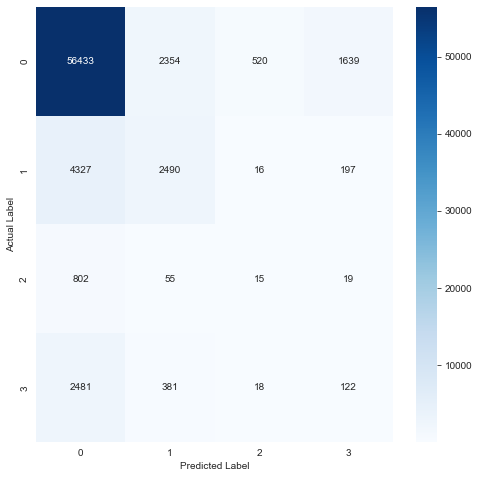

In [107]:
plt.figure(figsize = (8, 8))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [108]:
print("True Predictions : ", CM[0][0]+CM[1][1]+CM[2][2]+CM[3][3])
print("False Predictions : ", CM[0][1]+CM[0][2]+CM[0][3]+CM[1][0]+CM[1][2]+CM[1][3]+CM[2][0]+CM[2][1]+CM[2][3]+CM[3][0]+CM[3][1]+CM[3][2])


True Predictions :  59060
False Predictions :  12809


In [109]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     60946
           1       0.47      0.35      0.40      7030
           2       0.03      0.02      0.02       891
           3       0.06      0.04      0.05      3002

    accuracy                           0.82     71869
   macro avg       0.36      0.33      0.34     71869
weighted avg       0.80      0.82      0.81     71869



In [110]:
import pickle

In [111]:

pickle.dump(RandomForest,open('rfmodel.pkl','wb'))
model = pickle.load(open('rfmodel.pkl','rb'))

MemoryError: 